In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('boston_housing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

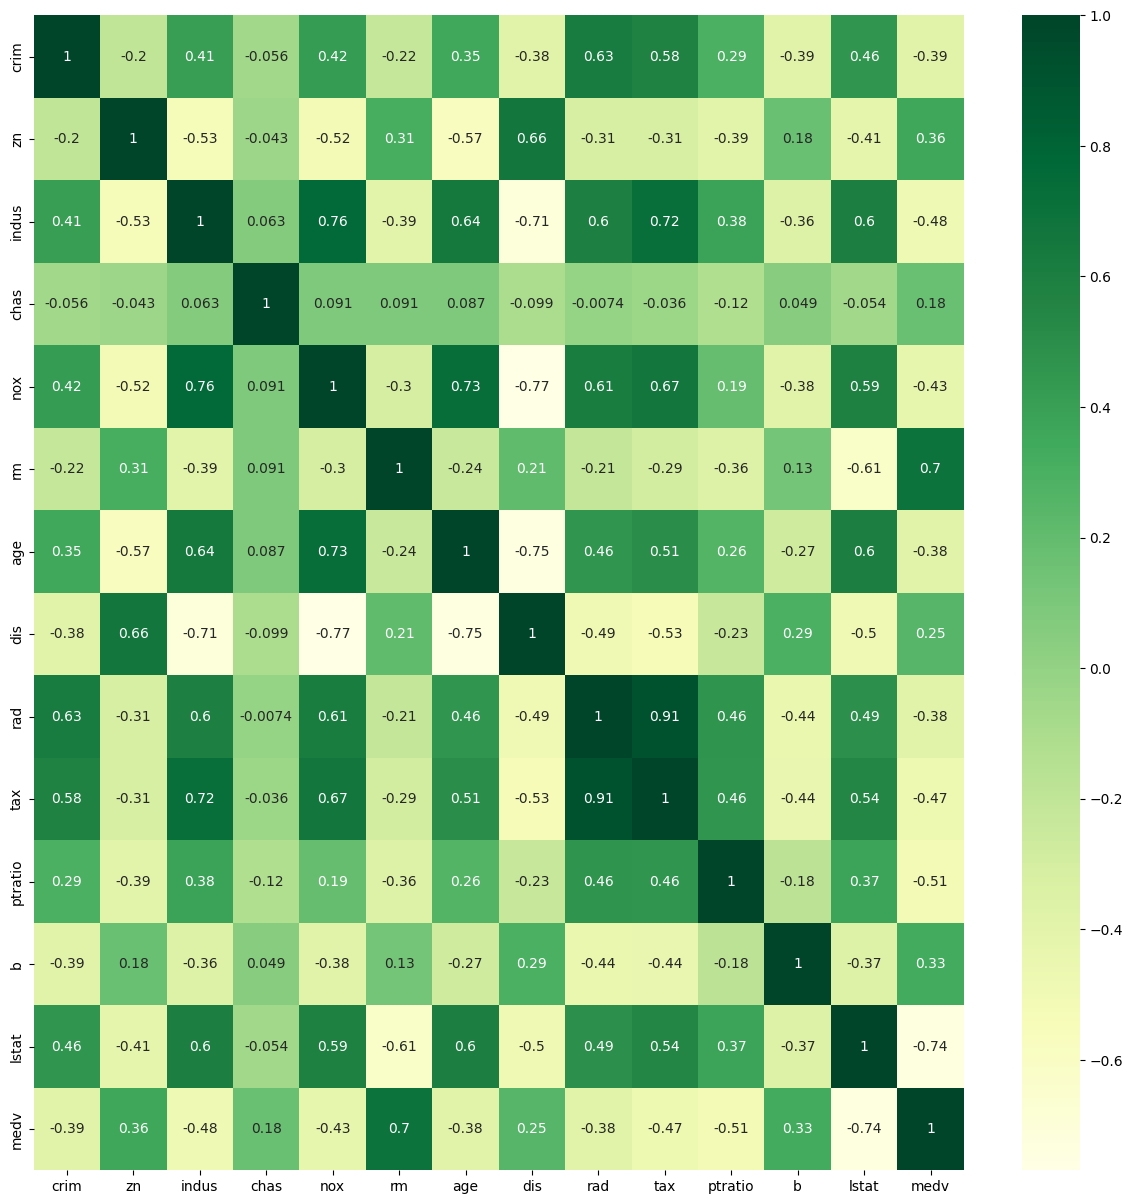

In [7]:
plt.figure(figsize=[15,15])
sns.heatmap(data.corr(),cmap='YlGn',annot=True)

In [510]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [544]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [546]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

<Axes: ylabel='nox'>

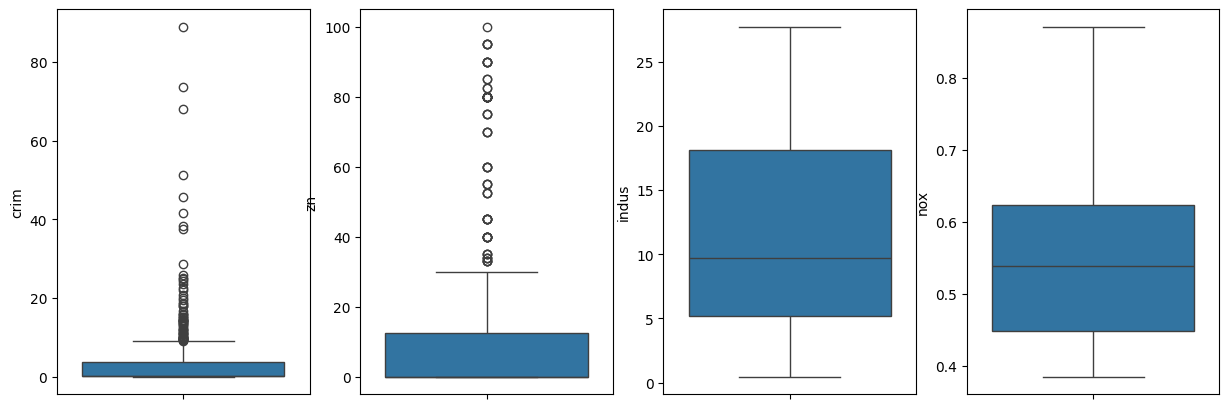

In [560]:
fig,ax=plt.subplots(1,4,figsize=(15,5))
sns.boxplot(data=data,y='crim',ax=ax[0])
sns.boxplot(data=data,y='zn',ax=ax[1])
sns.boxplot(data=data,y='indus',ax=ax[2])
sns.boxplot(data=data,y='nox',ax=ax[3])

<Axes: ylabel='tax'>

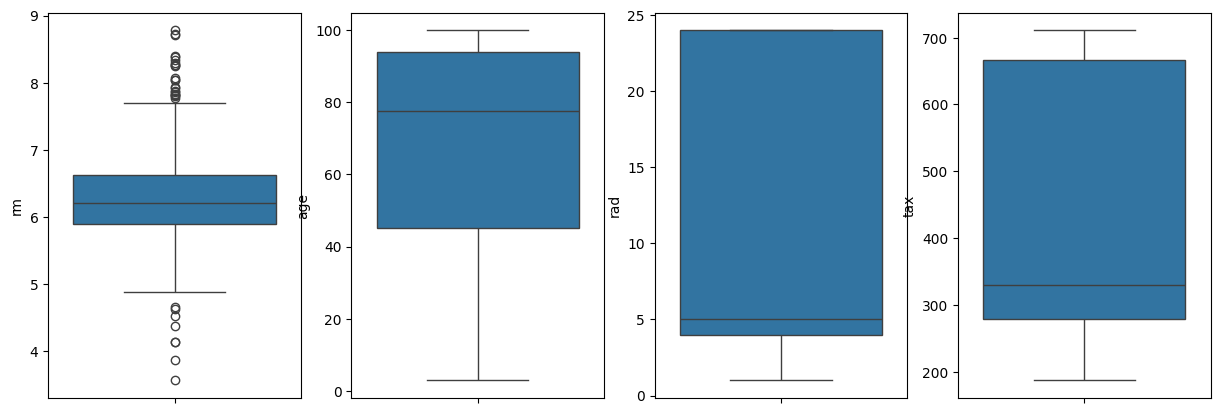

In [562]:
fig,ax=plt.subplots(1,4,figsize=(15,5))
sns.boxplot(data=data,y='rm',ax=ax[0])
sns.boxplot(data=data,y='age',ax=ax[1])
sns.boxplot(data=data,y='rad',ax=ax[2])
sns.boxplot(data=data,y='tax',ax=ax[3])


<Axes: ylabel='lstat'>

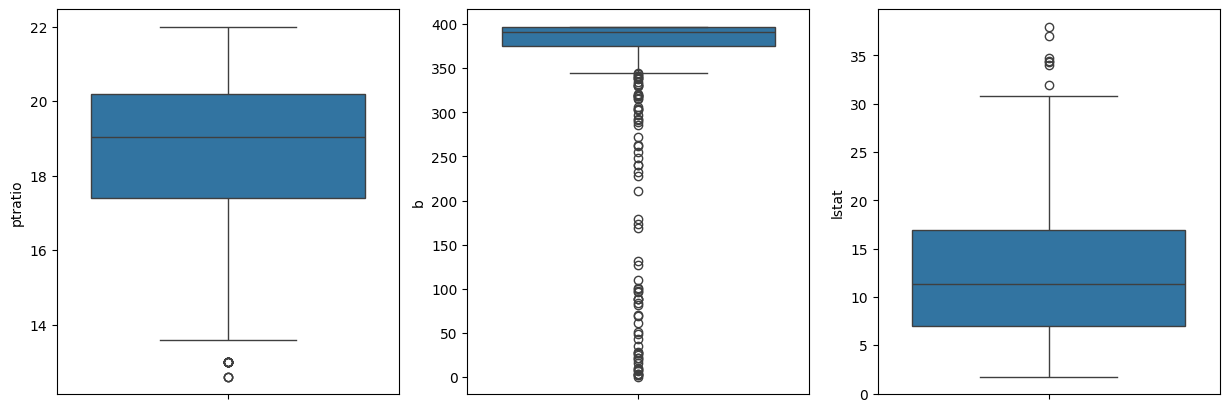

In [564]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data,y='ptratio',ax=ax[0])
sns.boxplot(data=data,y='b',ax=ax[1])
sns.boxplot(data=data,y='lstat',ax=ax[2])

In [512]:
X=data.drop(['medv','dis','chas'],axis=1)
y=data['medv']

In [513]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [514]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [515]:
model=LinearRegression()

In [516]:
model.fit(X_train,y_train)

LinearRegression()

In [517]:
y_pred=model.predict(X_test)

In [518]:
comp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred} )

In [519]:
comp.head(10)

,Actual,Predicted
224,44.8,37.837665
137,17.1,18.938946
453,17.8,24.733092
303,33.1,32.315864
254,21.9,26.341693
37,21.0,22.199101
442,18.4,20.219113
417,10.4,6.239036
16,23.1,20.603480
209,20.0,14.566006


In [520]:
from sklearn.metrics import mean_squared_error,r2_score

In [521]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [566]:
print("R2_Score : ",r2)
print("Mean Squared Error : ",mse)

R2_Score :  0.7787081249745514
Mean Squared Error :  18.31296551446842
